# Seaborn Kütüphanesi

Bu uygulamalı derste, güçlü ancak kullanımı kolay bir veri görselleştirme aracı olan seaborn ile veri görselleştirmelerinizi bir sonraki seviyeye nasıl taşıyacağınızı öğreneceksiniz. 

![figure](https://seaborn.pydata.org/_images/logo-wide-lightbg.svg)


## 1. Çizgi Grafikler

Seaborn kütüphanesini çağırmak için `import seaborn as sns` komutunu kullanacağız. Seaborn kütüphanesi matplotlib kütüphanesine bağımlı olduğu için, matplotlib kütüphanesini de import etmemiz gerekmektedir. Üzerinde çalışacağımız veri bir .csv dosyası olacağı için pandas kütüphanesine de gereksinim duyuyoruz. 

Altı ülke için geçmiş FIFA sıralamalarını gösteren bir veri kümesiyle çalışacağız `fifa.csv`: Arjantin (ARG), Brezilya (BRA), İspanya (ESP), Fransa (FRA), Almanya (GER) ve İtalya (ITA).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

İlk argüman olarak, veri kümesinin dosya yolunun her zaman önce sağlanması gerekir.

`index_col = "Date"`: Veri kümesini yüklediğimizde, ilk sütundaki her kaydın farklı bir satırı göstermesini istiyoruz. Bunu yapmak için, index_col değerini ilk sütunun adına sabitledik.

`parse_dates` = `True`:  Bu, not defterinde satır etiketlerinin bir tarih olarak algılanmasını sağlar. 

In [2]:
fifa_data = pd.read_csv('fifa.csv', index_col="Date", parse_dates=True)
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


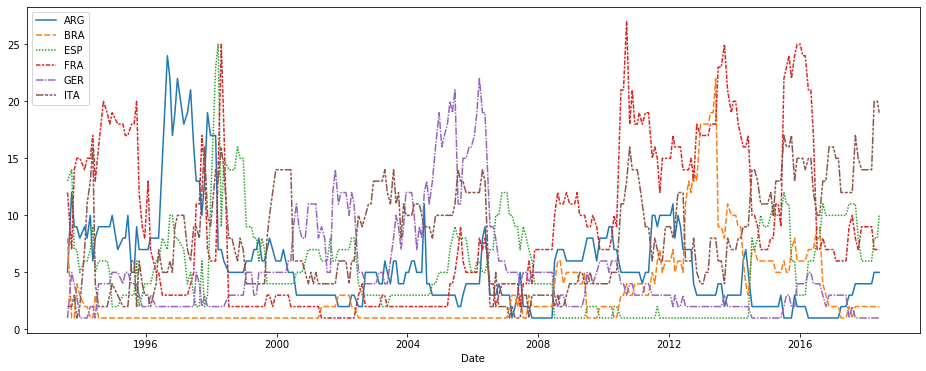

In [3]:
# Grafik çerçevesinin enini ve boyunu belirleyelim. 
plt.figure(figsize=(16,6))

# sns.lineplot fonksiyonunu kullanarak altı ülkenin de sıralamasının zaman içerisinde nasıl dalgalandığını görelim. 
sns.lineplot(data=fifa_data)

`sns.lineplot` fonksiyonu ile veri setindeki tüm değerleri otomatik olarak çizgi grafikler görselleştirdik. Çizgilere ilişkin herhangi bir parametre belirtmeden matplotlib'e kıyasla daha kısa yoldan bu grafiği elde ettik. Seaborn pratik olarak daha az kodla, daha anlamlı grafikler elde etmemizi sağlamaktadır. 

Şimdi, sadece Almanya ve İtalya'nın sıralamasının zaman içinde nasıl değiştiğini gözlemleyelim. Bunun için veri seri içinde (`fifa_data`) filtrelemeler yapmamız gerekmektedir. `label` argümanını ekleyerek otomatik olarak lejant da oluşturabilmekteyiz. 

Text(0.5, 0, 'Yıllar')

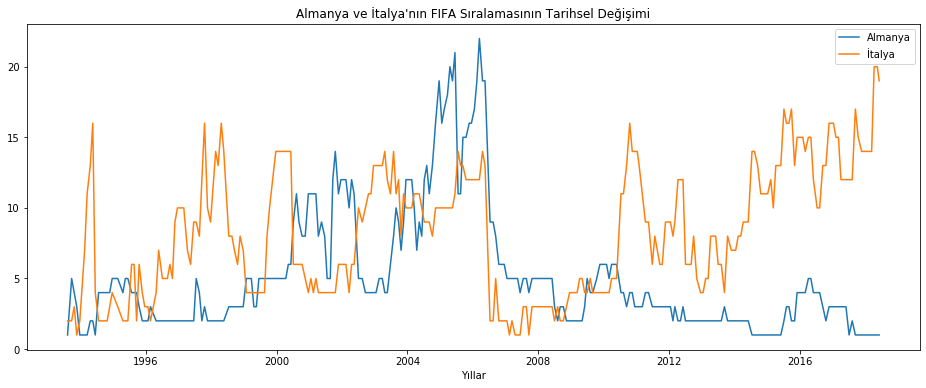

In [4]:
# Grafik çerçevesinin enini ve boyunu belirleyelim. 
plt.figure(figsize=(16,6))

# Grafiğe başlık ekleyelim. 
plt.title("Almanya ve İtalya'nın FIFA Sıralamasının Tarihsel Değişimi")

# Almanya verilerini filtreleyelip, çizdirelim. 
sns.lineplot(data=fifa_data['GER'], label="Almanya")

# İtalya verilerini filtreleyelip, çizdirelim. 
sns.lineplot(data=fifa_data['ITA'], label="İtalya")

# Add label for horizontal axis
plt.xlabel("Yıllar")

## 2. Bar Grafikleri

Bar grafikleri için, ABD Ulaştırma Bakanlığı'nın uçuş gecikmelerini irdelyen bir veri kümesiyle çalışacağız (`flight_delay.csv`).

Bu csv dosyası, her ay için bir satır (burada 1 = Ocak, 2 = Şubat vb.) ve her havayolu kodu için bir sütun göstermektedir.

Her veri kaydı, farklı bir havayolu ve ay için (tümü 2015 yılında) ortalama varış gecikmesini (dakika cinsinden) gösterir. Negatif girişler (ortalama olarak) erken varma eğiliminde olan uçuşları belirtir. Örneğin, Ocak ayında Amerikan Havayolları uçuşları (havayolu kodu: AA) ortalama yaklaşık 7 dakika geç gelmiştir. Nisan ayında Alaska Havayolları uçuşları (havayolu kodu: AS) ortalama olarak yaklaşık 3 dakika erken varmıştır.

In [5]:
ucus_verisi = pd.read_csv('flight_delays.csv', index_col="Month")
ucus_verisi

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


Spirit Airlines (havayolu kodu: NK) uçuşları için aylık ortalama varış rötarını gösteren bir bar grafik oluşturmak istediğimizi varsayalım. Bar grafik için `sns.barplot ` fonksiyonunu kullanacağız. Argüman olarak, x eksenine ucus_verisi indeks elemanlarını, y eksenine ise NK sütununu ekleyeceğiz. 

Text(0, 0.5, 'Varış Rötarı (Dakika)')

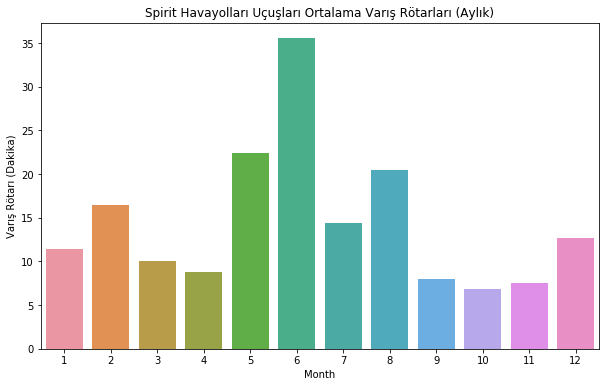

In [6]:
# Grafik çerçevesinin enini ve boyunu belirleyelim. 
plt.figure(figsize=(10,6))

# Grafiğe bir başlık ekleyelim. 
plt.title("Spirit Havayolları Uçuşları Ortalama Varış Rötarları (Aylık)")

# Bar grafiği
sns.barplot(x=ucus_verisi.index, y=ucus_verisi['NK'])

# Düşey eksen isminin girilmesi
plt.ylabel("Varış Rötarı (Dakika)")

Seaborn kütüphanesi bar grafik çizerken yukarıdaki renk paletini sabit olarak kullanmaktadır. Ancak bu renk paletini değiştirmek olanaklıdır. `sns.barplot` fonksiyonuna `palette` argümanını ekleyerek seçeceğimiz renk paleti ismini belirleyebiliriz. Renk paletleri için [bu bağlantıdaki](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f) yazıyı incelemenizi öneririm. 

Text(0, 0.5, 'Varış Rötarı (Dakika)')

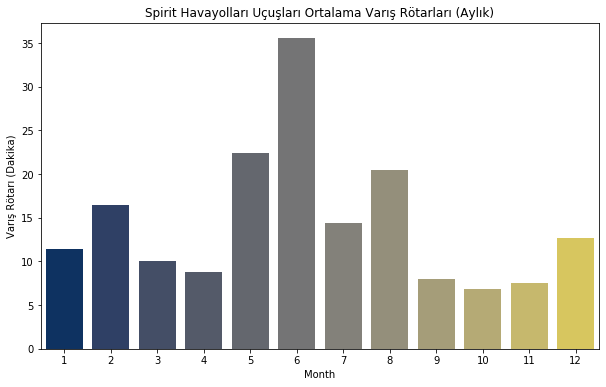

In [7]:
#  Grafik çerçevesinin enini ve boyunu belirleyelim. 
plt.figure(figsize=(10,6))

# Grafiğe bir başlık ekleyelim. 
plt.title("Spirit Havayolları Uçuşları Ortalama Varış Rötarları (Aylık)")

# Bar grafiği
sns.barplot(x=ucus_verisi.index, y=ucus_verisi['NK'], palette="cividis")

#  Düşey eksen isminin girilmesi
plt.ylabel("Varış Rötarı (Dakika)")

Text(0, 0.5, 'Varış Rötarı (Dakika)')

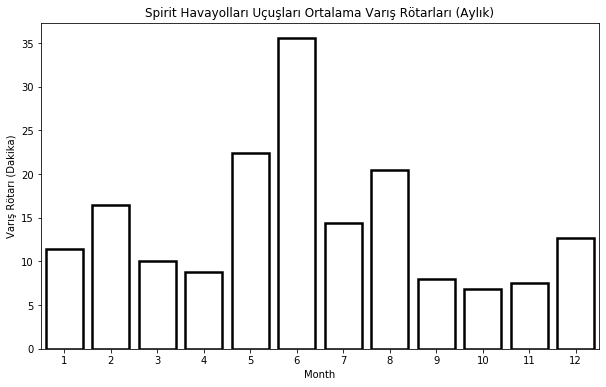

In [8]:
# Grafik çerçevesinin enini ve boyunu belirleyelim.
plt.figure(figsize=(10,6))

# Grafiğe bir başlık ekleyelim.
plt.title("Spirit Havayolları Uçuşları Ortalama Varış Rötarları (Aylık)")

# Bar grafiği. Renk paleti yerine çevresi siyah içi beyaz barlar kullanalım. Kalem kalınlığı 2.5 punto. 
sns.barplot(x=ucus_verisi.index, y=ucus_verisi['NK'], linewidth=2.5, facecolor="white", edgecolor="black")

# Düşey eksen isminin girilmesi
plt.ylabel("Varış Rötarı (Dakika)")

## 3. Isı Haritaları

Isı haritalarının arkasında yatan fikir basittir: sayıları renklerle değiştirin.
Bu görselleştirme stili coğrafi verilerle de yaygın olarak kullanıldı ve değişkenlerin yoğunluğunu tanımlamak, desenleri, varyansı ve hatta anormallikleri görselleştirmek için yaygın olarak uygulandı.


![figure](https://miro.medium.com/max/700/1*EuGPeHL4OW4-k92HJJEgHw.png)


Aşağıdaki kod hücresinde, `flight_data `veri setindeki tüm değerleri hızlı bir şekilde görselleştirmek için bir ısı haritası oluşturuyoruz. Isı haritasındaki her kare (hücre), karşılık gelen değere göre bir renkle kodlanmıştır. `sns.heatmap` fonksiyonun otomatik olarak ürettiği bu ısı haritasında, koyu renkli kareler düşük değerleri, açık renkli kareler yüksek değerli temsil etmektedir. Her grafik stilinde olduğu gibi, ısı haritalarında da renk paletlerini değiştirmek olanaklıdır. 

Bu kodun üç ana bileşeni vardır:

`sns.heatmap`: Bu, not defterine bir ısı haritası oluşturmak istediğimizi söyler.

`data = flight_data`: Bu, not defterine ısı haritasını oluşturmak için `flight_data` veri setindeki tüm değerleri kullanmasını söyler.

`annot = True`: Bu, her hücreye ait değerlerin grafikte görünmesini sağlar. (Bunu dışarıda bırakmak hücrelerin her birindeki sayıları kaldırır!)

Text(105.0, 0.5, 'Aylar')

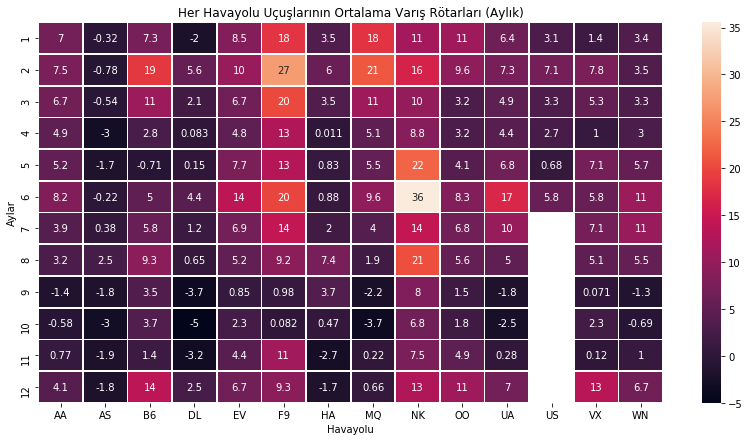

In [18]:
# Grafik çerçevesinin enini ve boyunu belirleyelim.
plt.figure(figsize=(14,7))

# Grafiğe bir başlık ekleyelim.
plt.title("Her Havayolu Uçuşlarının Ortalama Varış Rötarları (Aylık)")

# Her havayolu şirketinin tüm aylara ilişkin ortalama varış gecikmesi değerinin ısı haritasını çıkaralım. 
sns.heatmap(data=ucus_verisi, annot=True,linewidths=.7)

# Yatak ve düşey eksen isimlerini belirtelim.
plt.xlabel("Havayolu")
plt.ylabel("Aylar")

## 4. Saçılım Grafikleri

Bir sigorta şirketinin bazı müşterilerin neden diğerlerinden daha fazla ödediğini anlamak için bir sigorta veri kümesiyle çalışacağız.

In [10]:
sigorta_veri = pd.read_csv('sigorta.csv')
sigorta_veri.head()

,yas,cinsiyet,vucut_kitle_indeksi,cocuk_sayisi,sigara_kullanımi,bolge,prim_odemesi
0,19,K,27.900,0,Evet,Mersin,16884.92400
1,18,E,33.770,1,Hayır,Adana,1725.55230
2,28,E,33.000,3,Hayır,Adana,4449.46200
3,33,E,22.705,0,Hayır,Gaziantep,21984.47061
4,32,E,28.880,0,Hayır,Gaziantep,3866.85520


Basit bir saçılım grafiği oluşturmak için `sns.scatterplot` komutunu kullanırız 

x eksenine `vucut_kitle_indeksi` sütununu, y eksenine ise `prim_odemesi` sütununu yerleştirelim.

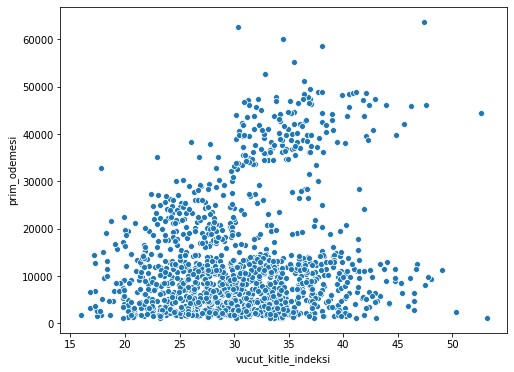

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=sigorta_veri['vucut_kitle_indeksi'], y=sigorta_veri['prim_odemesi'])

## 5. Regresyon Çizgileri

Yukarıdaki saçılım grafiği, vücut kitle indeksinin ve sigorta ücretlerinin pozitif olarak ilişkili (korelasyonlu) olduğunu, burada daha yüksek VKİ'ye sahip müşterilerin tipik olarak sigorta maliyetlerinde daha fazla ödeme yapma eğiliminde olduğunu göstermektedir. (Bu model mantıklıdır, çünkü yüksek VKİ tipik olarak daha yüksek kronik hastalık riski ile ilişkilidir.)

Bu ilişkinin gücünü iki kez kontrol etmek için bir regresyon çizgisi (verilere en iyi uyan çizgiyi) eklemek isteyebilirsiniz. Bunu, komutu `sns.regplot` olarak değiştirerek yapıyoruz. Burada seaborn, vücut kitle indeksi ve prim ödemesi arasındaki ilişkiyi lineer bir çizgi ile tahmin etmeye çalışacaktır. 

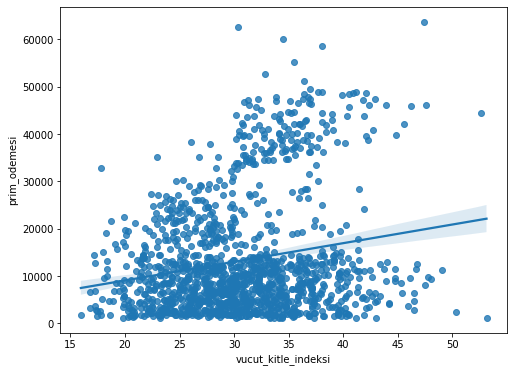

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x=sigorta_veri['vucut_kitle_indeksi'], y=sigorta_veri['prim_odemesi'])

<Figure size 576x432 with 0 Axes>

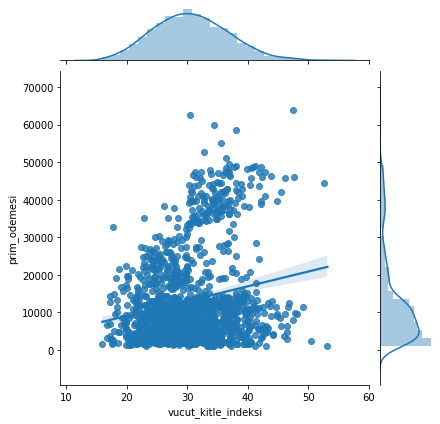

In [13]:
plt.figure(figsize=(8,6))
sns.jointplot(x="vucut_kitle_indeksi", y="prim_odemesi", data=sigorta_veri, kind="reg");

Üç değişken arasındaki ilişkileri görüntülemek için de saçılım grafiklerini kullanabiliriz. Bunu yapmanın bir yolu, noktaları renklerle kodlamaktır.

Örneğin, sigara kullanımının VKİ ile sigorta maliyetleri arasındaki ilişkiyi nasıl etkilediğini anlamak için noktaları `sigara_kullanimi` ile renklerle kodlayabilir ve diğer iki sütunu (`vucut_kitle_indeksi`, `'prim_odemesi'`) eksenler üzerine çizebiliriz.

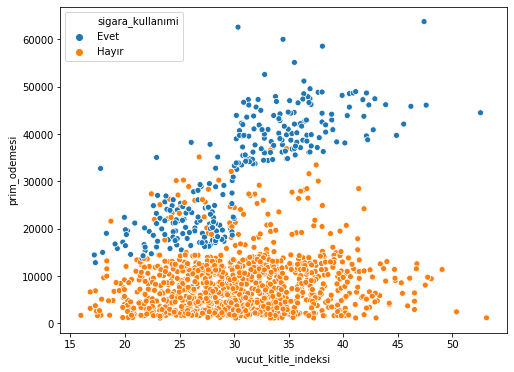

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=sigorta_veri['vucut_kitle_indeksi'], y=sigorta_veri['prim_odemesi'], hue=sigorta_veri['sigara_kullanımi'])

Bu saçılım grafiği, sigara içmeyenlerin artan VKİ ile biraz daha fazla ödeme yapma eğiliminde iken, sigara içenlerin ÇOK daha fazla ödeme yaptığını göstermektedir.

Bu gerçeği daha da vurgulamak için, sigara içenlere ve içmeyenlere karşılık gelen iki regresyon çizgisi eklemek için `sns.lmplot` komutunu kullanabiliriz. (Sigara içenler için regresyon çizgisinin, içmeyenler için olan çizgiye göre çok daha dik bir eğime sahip olduğunu fark edeceksiniz!)

<Figure size 720x576 with 0 Axes>

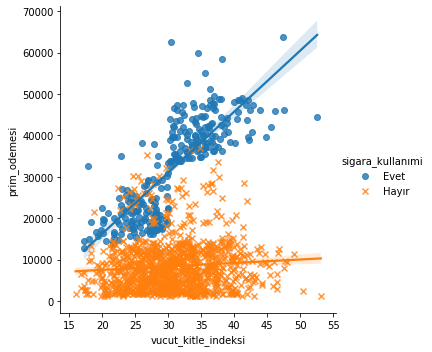

In [15]:
plt.figure(figsize=(10,8))
sns.lmplot(x="vucut_kitle_indeksi", y="prim_odemesi", hue="sigara_kullanımi", data=sigorta_veri,  markers=["o", "x"])

## 6. Yığın Grafiği (Swarm Plot)

Son olarak, öğreneceğiniz bir grafik stili daha var. Bu, saçılım grafiklerini görmeye alışkın olduğunuzdan biraz farklı görünebilir. Genellikle, iki sürekli değişken (`"vucut_kitle_indeksi"` ve `"prim_odemesi"` gibi) arasındaki ilişkiyi vurgulamak için saçılım grafikleri kullanırız. Ancak, saçılım grafiğinin tasarımını ana eksenlerden birinde kategorik bir değişkeni (`sigara_kullanımı = Evet` gibi) içerecek şekilde uyarlayabiliriz. Bu grafik tipine **kategorik saçılım grafiği** (yığın grafiği) olarak atıfta bulunacağız ve onu `sns.swarmplot `komutu ile oluşturacağız.

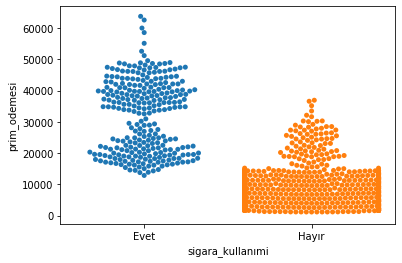

In [16]:
sns.swarmplot(x=sigorta_veri['sigara_kullanımi'],y=sigorta_veri['prim_odemesi'])